<a href="https://colab.research.google.com/github/AnnanyaV/kaggle/blob/master/LogisticRegression_Diabetes_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Applying Logistic Regression Classifier on Diabetes dataset**

In [1]:
#@title Run this cell to Download the required files

!wget https://cdn.talentsprint.com/aiml/Experiment_related_data/pima-indians-diabetes.csv
def setup():
  # ipython.magic("sx pip3 install torch")
  ipython.magic("sx pip install seaborn")
  ipython.magic("sx pip install sklearn")
  from IPython.display import HTML, display
  display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
  print("Setup completed successfully")
  return

--2020-10-03 09:58:16--  https://cdn.talentsprint.com/aiml/Experiment_related_data/pima-indians-diabetes.csv
Resolving cdn.talentsprint.com (cdn.talentsprint.com)... 172.105.34.236
Connecting to cdn.talentsprint.com (cdn.talentsprint.com)|172.105.34.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24045 (23K) [application/octet-stream]
Saving to: ‘pima-indians-diabetes.csv’

pima-indians-diabet 100%[===================>]  23.48K  --.-KB/s    in 0s      

2020-10-03 09:58:19 (314 MB/s) - ‘pima-indians-diabetes.csv’ saved [24045/24045]



In [2]:
# Import required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Loading the data** 

In [6]:
data_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
data = pd.read_csv("pima-indians-diabetes.csv", header=None, names=data_names)

In [7]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#split the dataset into features and target variable
Features = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree', 'skin']
X = data[Features] # Features
y = data.label # Target variable

### **Data Munging**

**1) Check the descriptive information of Dataset using pandas describe and info methods**

In [9]:
data.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**2) Check for nulls in the dataset columns and if nulls encountered fill the data columns with suitable values based on central tendency measures(mean, median, mode)**

In [11]:
data.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

**3) Write a function to plot graphs between all independent features against dependent features in the dataset and find the relationship.**

In [18]:
import seaborn as sns
def plot_scatter(df, features, labels):
  plt.figure(figsize=(20,20))
  for loc, feature in enumerate(features):
    ax= plt.subplot(3, 3, loc+1)
    sns.scatterplot(x=feature, y=labels, data= df)

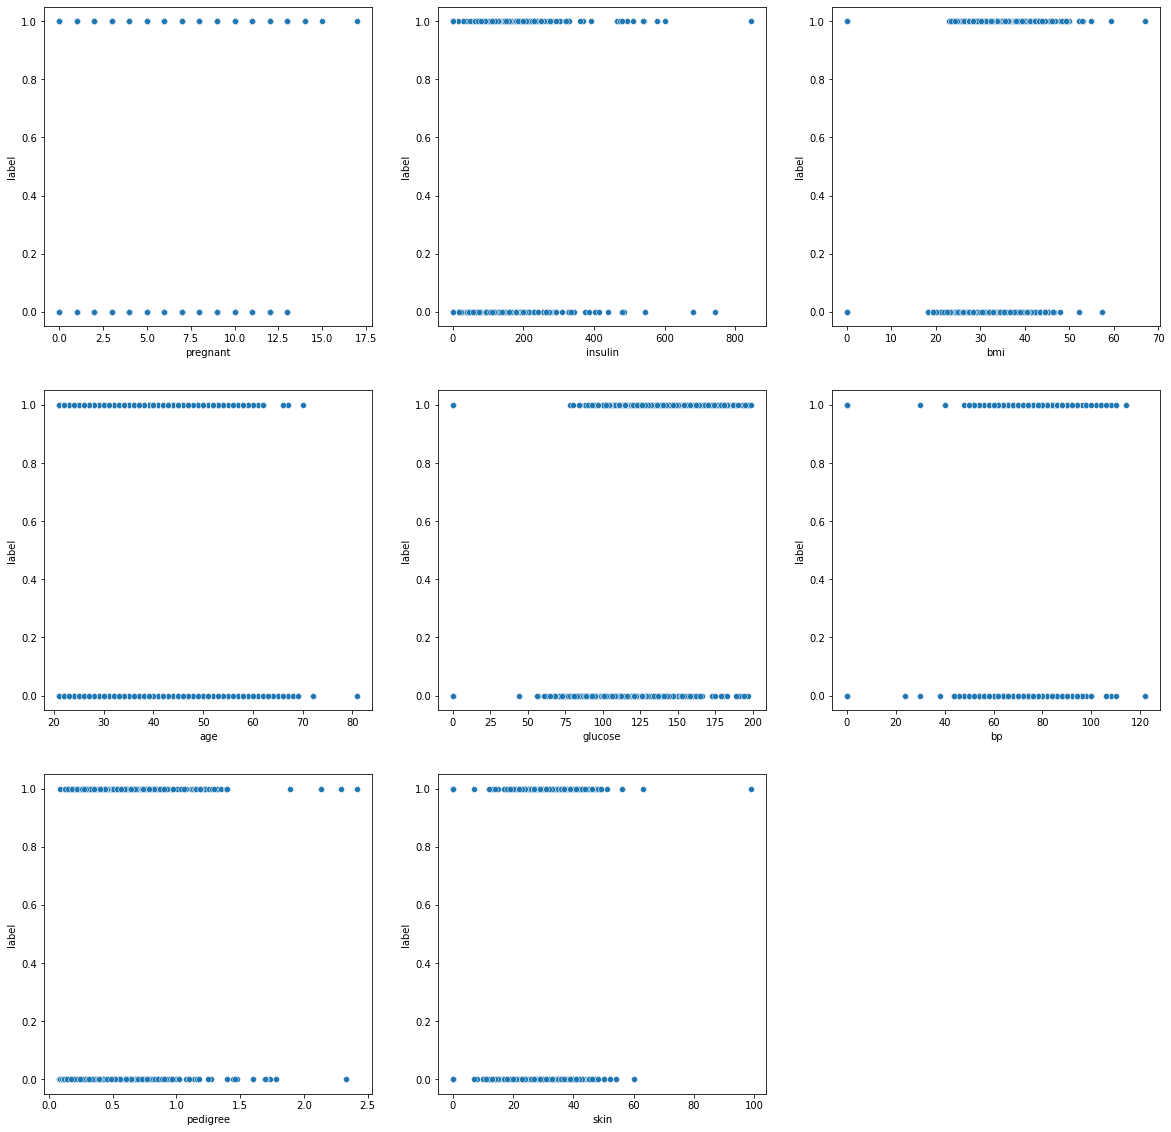

In [19]:
plot_scatter(data, Features, 'label')

**4) Plot a suitable graph to find multicollinearity(relationship between independent features) in the given dataset.** 

For **Hint** select the below empty whitespace above the arrow: 

<font color='white'>Check Pairplot in seaborn</font>

<font color='white'>$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$</font>$\uparrow$

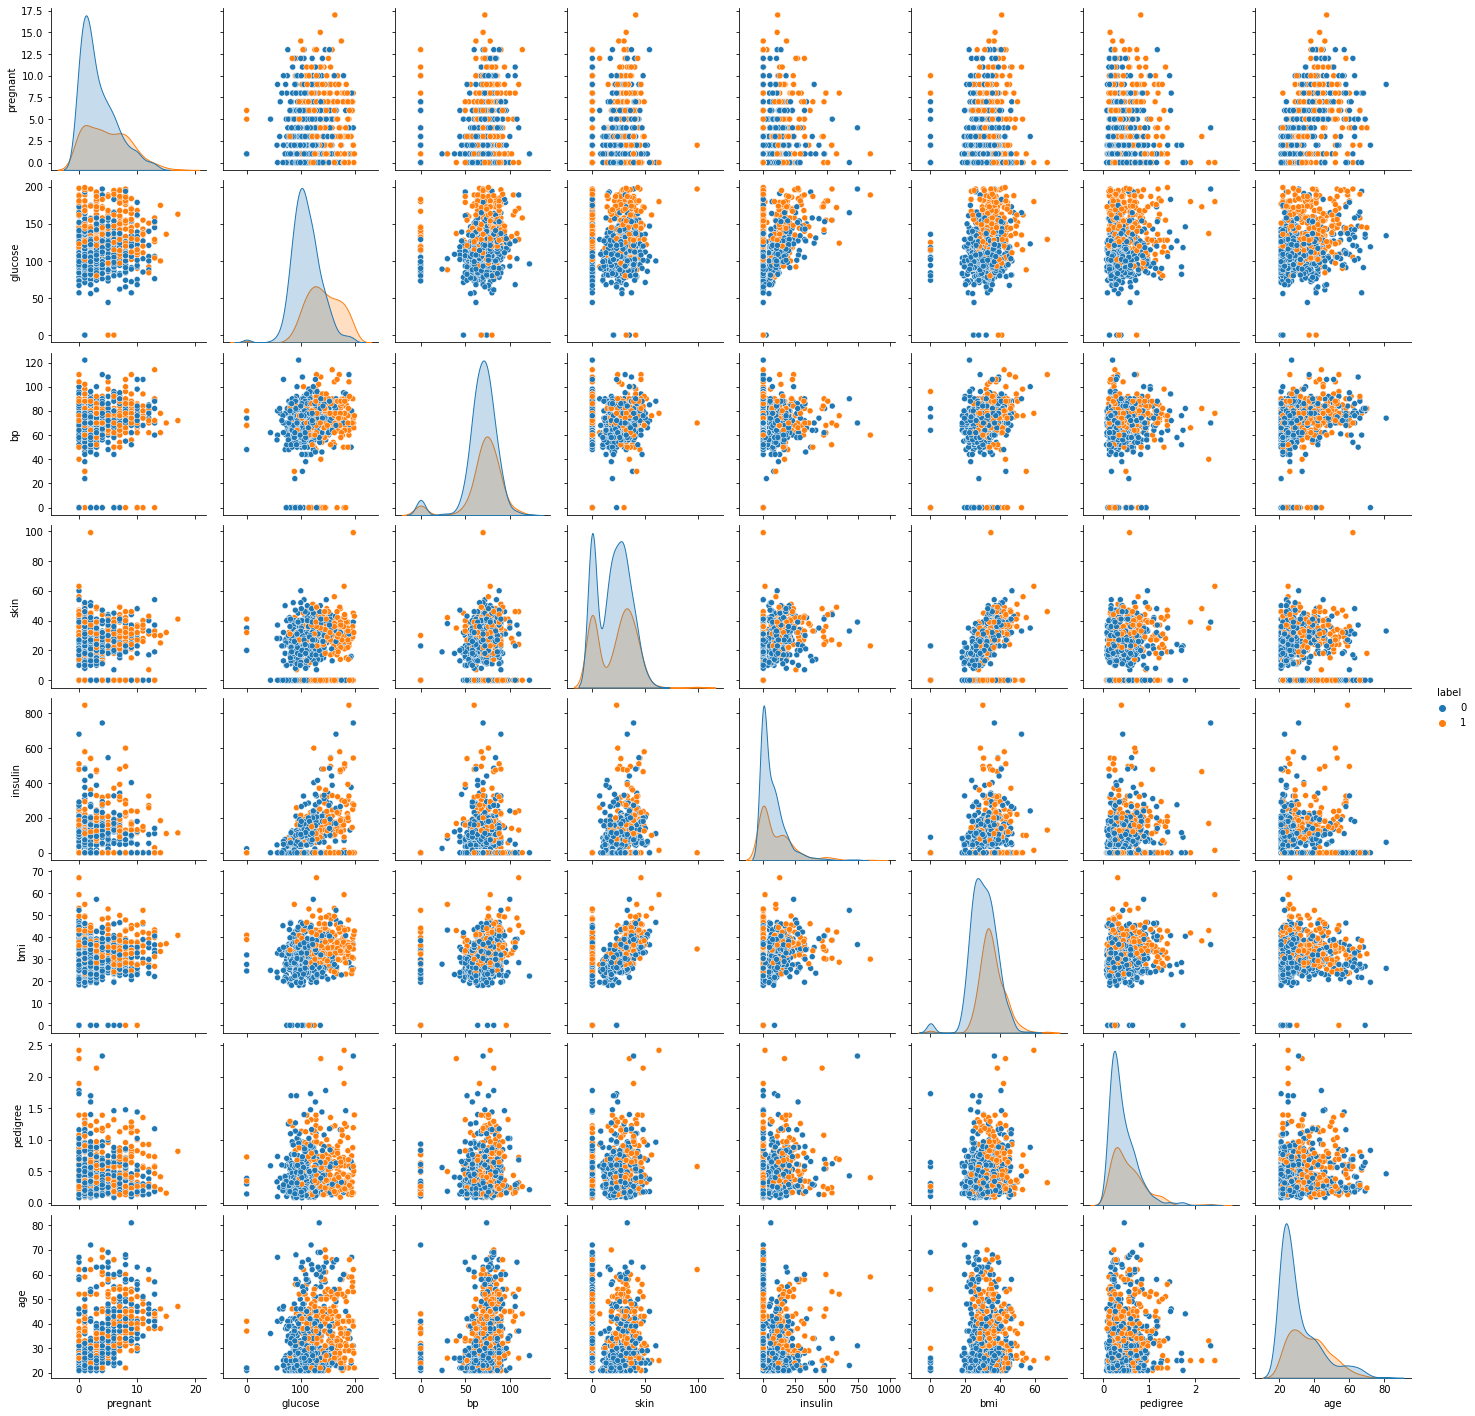

In [20]:
sns.pairplot(data, hue='label')

**5) Find the correlation between the features and labels using heatmaps and correlation matrix.**

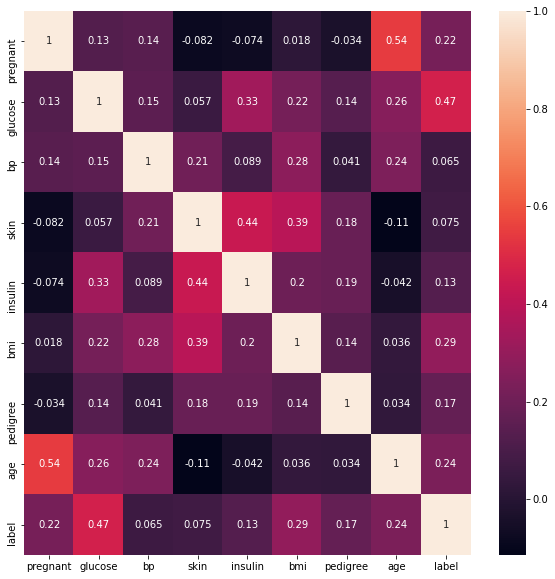

In [24]:
corr= data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.show()
plt.close()

**6) Apply Feature scaling to standardize the data columns to common units to avoid biased model.** 

For **Hint** select the below empty whitespace above the arrow: 

<font color='white'>Check StandardScaler</font>

<font color='white'>$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$</font>$\uparrow$

In [25]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_scaled= sc.fit_transform(X)

### **Splitting the data**
To understand the model performance, we divide the dataset into a training set and a test set. Let's split the dataset by using function
train_test_split() from sklearn. The 3 parameters to be passed are features, target, and test_set size. Additionally, you can use
random_state to select records randomly.

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.33, random_state=42)

Here we divided the data in to 2 parts. It means 75% of the data for training set and 25% for test set


### **Trying to fit the model**

Here we are importing the Logistic Regression module and creating a Logistic Regression classifier object using LogisticRegression()
function.

In [29]:
# import the class
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
clf = LogisticRegression()
# fit the model with data
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [30]:
(y_pred)

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

### **Evaluating the model**

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7401574803149606

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


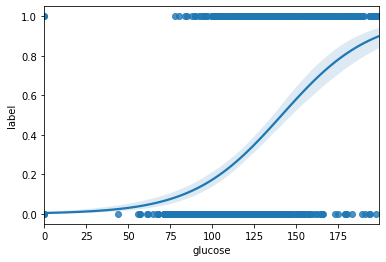

In [32]:
sns.regplot(x='glucose', y='label', data= data, logistic=True)

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier(n_estimators=2, max_depth=10)
rf_model.fit(x_train, y_train)
y_pred_train=rf_model.predict(x_train)
y_pred_test=rf_model.predict(x_test)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.8852140077821011
0.6771653543307087


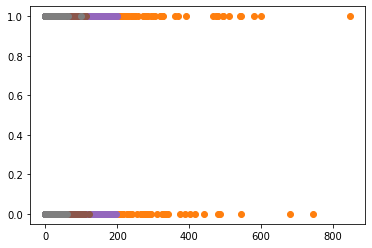

In [36]:
import matplotlib.pyplot as plt
plt.plot(X, y, "o")